# Client Olist - Phase 1 Analyse du fichier source `Orders`

## Importation des fichiers

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
df_order = pd.read_csv('../SOURCE/olist_orders_dataset.csv')

# Nombre de ligne et de colonne
print('Data order', df_order.shape)

Data order (99441, 8)


In [7]:
df_order.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
df_order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [9]:
df_order.isnull().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [10]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
round(df_order.isna().sum() / df_order.shape[0],2)

order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.00
order_delivered_carrier_date     0.02
order_delivered_customer_date    0.03
order_estimated_delivery_date    0.00
dtype: float64

In [12]:
for col in df_order.columns:
    Nb_unique = df_order[col].unique().shape[0]
    Nb_value = df_order[col].count()
    print(f'dans la colonne {col} il y a {Nb_unique} unique et tant {Nb_value} de valeur')

dans la colonne order_id il y a 99441 unique et tant 99441 de valeur
dans la colonne customer_id il y a 99441 unique et tant 99441 de valeur
dans la colonne order_status il y a 8 unique et tant 99441 de valeur
dans la colonne order_purchase_timestamp il y a 98875 unique et tant 99441 de valeur
dans la colonne order_approved_at il y a 90734 unique et tant 99281 de valeur
dans la colonne order_delivered_carrier_date il y a 81019 unique et tant 97658 de valeur
dans la colonne order_delivered_customer_date il y a 95665 unique et tant 96476 de valeur
dans la colonne order_estimated_delivery_date il y a 459 unique et tant 99441 de valeur


In [13]:
df_order["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [14]:
for ligne in df_order["order_status"].unique():
    df_order_etat = df_order[df_order["order_status"]==ligne]
    ratio = (df_order_etat.shape[0]/ df_order.shape[0])*100
    print(f"etat de la commande : {ligne} et nombre de ligne en cours {df_order_etat.shape[0]} le ratio est de : {round(ratio,2)}")

etat de la commande : delivered et nombre de ligne en cours 96478 le ratio est de : 97.02
etat de la commande : invoiced et nombre de ligne en cours 314 le ratio est de : 0.32
etat de la commande : shipped et nombre de ligne en cours 1107 le ratio est de : 1.11
etat de la commande : processing et nombre de ligne en cours 301 le ratio est de : 0.3
etat de la commande : unavailable et nombre de ligne en cours 609 le ratio est de : 0.61
etat de la commande : canceled et nombre de ligne en cours 625 le ratio est de : 0.63
etat de la commande : created et nombre de ligne en cours 5 le ratio est de : 0.01
etat de la commande : approved et nombre de ligne en cours 2 le ratio est de : 0.0


In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

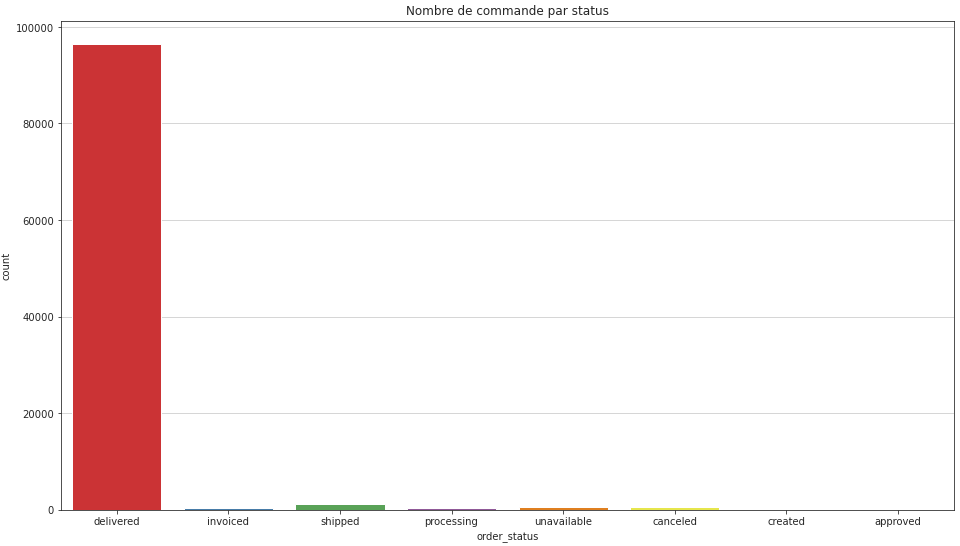

In [37]:
plt.rcParams["figure.figsize"]=[16,9] # Pour agrandir le graphique de façon global
with sns.axes_style('ticks', {'figure.facecolor': 'white', 'font.family': ['sans-serif'],'font.sans-serif': ['Arial',
  'DejaVu Sans'], 'axes.grid': True}):
    sns.countplot(x="order_status", data = df_order, palette = "Set1")
    plt.title('Nombre de commande par status')
    plt.savefig('etatliv.png')

Conversion des colonnes en date

In [17]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_approved_at"]=pd.to_datetime(df_order["order_approved_at"])
df_order["order_delivered_carrier_date"]=pd.to_datetime(df_order["order_delivered_carrier_date"])
df_order["order_delivered_customer_date"]=pd.to_datetime(df_order["order_delivered_customer_date"])
df_order["order_estimated_delivery_date"]=pd.to_datetime(df_order["order_estimated_delivery_date"])

df_order["order_purchase_timestamp"] = df_order["order_purchase_timestamp"].dt.strftime("%d/%m/%y")
df_order["order_approved_at"]=df_order["order_approved_at"].dt.strftime("%d/%m/%y")
df_order["order_delivered_carrier_date"]=df_order["order_delivered_carrier_date"].dt.strftime("%d/%m/%y")
df_order["order_delivered_customer_date"]=df_order["order_delivered_customer_date"].dt.strftime("%d/%m/%y")
df_order["order_estimated_delivery_date"]=df_order["order_estimated_delivery_date"].dt.strftime("%d/%m/%y")

df_order["order_purchase_timestamp"] = pd.to_datetime(df_order["order_purchase_timestamp"])
df_order["order_approved_at"]=pd.to_datetime(df_order["order_approved_at"])
df_order["order_delivered_carrier_date"]=pd.to_datetime(df_order["order_delivered_carrier_date"])
df_order["order_delivered_customer_date"]=pd.to_datetime(df_order["order_delivered_customer_date"])
df_order["order_estimated_delivery_date"]=pd.to_datetime(df_order["order_estimated_delivery_date"])

In [19]:
df_order['delai_commande'] = df_order["order_approved_at"] - df_order["order_purchase_timestamp"]
df_order['delai_expedition'] = df_order["order_delivered_carrier_date"] - df_order["order_purchase_timestamp"]
df_order['delai_livraison'] = df_order["order_delivered_customer_date"] - df_order["order_purchase_timestamp"]
df_order['delivery_on_times1'] = df_order["order_delivered_customer_date"] - df_order["order_delivered_carrier_date"] 
df_order['delivery_on_times2'] = df_order["order_delivered_customer_date"] - df_order["order_estimated_delivery_date"] 

df_order['delai_commande'] = df_order['delai_commande']/ np.timedelta64(1, 'D')
df_order['delai_expedition'] = df_order['delai_expedition']/ np.timedelta64(1, 'D')
df_order['delai_livraison'] = df_order['delai_livraison']/ np.timedelta64(1, 'D')
df_order['delivery_on_times1'] = df_order['delivery_on_times1']/ np.timedelta64(1, 'D')
df_order['delivery_on_times2'] = df_order['delivery_on_times2']/ np.timedelta64(1, 'D')


In [20]:
df_order.describe()

,delai_commande,delai_expedition,delai_livraison,delivery_on_times1,delivery_on_times2
count,99281.000000,97658.000000,96476.000000,96475.000000,96476.000000
mean,0.507015,3.826343,12.982877,9.174004,-10.603850
std,37.344129,82.926429,118.754209,109.383916,115.593644
min,-322.000000,-333.000000,-333.000000,-333.000000,-537.000000
25%,0.000000,1.000000,-36.000000,-18.000000,-61.000000
50%,0.000000,3.000000,9.000000,6.000000,-10.000000
75%,1.000000,31.000000,67.000000,41.000000,44.000000
max,543.000000,476.000000,688.000000,688.000000,347.000000


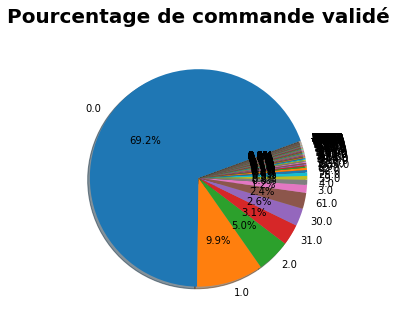

In [21]:
data = df_order['delai_commande'].value_counts()

plt.rcParams["figure.figsize"]=[5,5]
fig = plt.figure()
fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
plt.title("Pourcentage de commande validé", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
plt.draw()

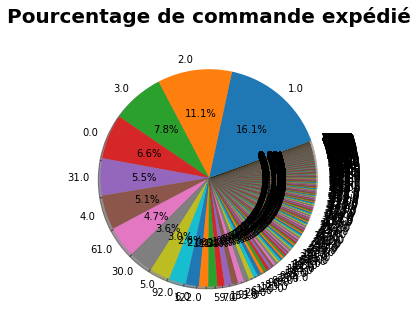

In [22]:
data = df_order['delai_expedition'].value_counts()

plt.rcParams["figure.figsize"]=[5,5]
fig = plt.figure()
fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
plt.title("Pourcentage de commande expédié", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
plt.draw()

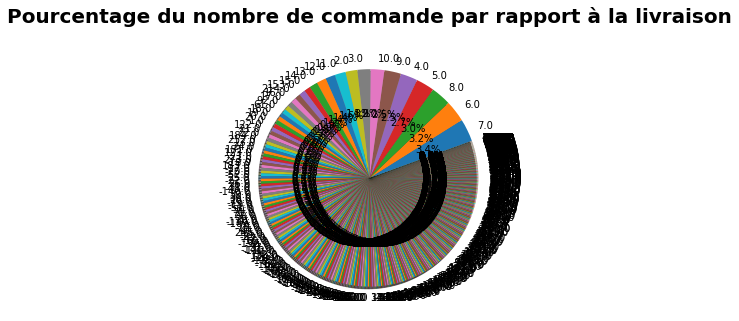

In [23]:
data = df_order['delai_livraison'].value_counts()

plt.rcParams["figure.figsize"]=[5,5]
fig = plt.figure()
fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
plt.title("Pourcentage du nombre de commande par rapport à la livraison", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
plt.draw()

In [24]:
(df_order['delivery_on_times1']==0).sum()/ len(df_order)

0.0030671453424643757

In [38]:
print(df_order[df_order['delivery_on_times1']==0].shape)
print(df_order[df_order['delivery_on_times2']==0].shape)

(305, 8)
(1292, 8)


In [26]:
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delai_commande,delai_expedition,delai_livraison,delivery_on_times1,delivery_on_times2
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-02-10,2017-02-10,2017-04-10,2017-10-10,2017-10-18,0.0,59.0,242.0,183.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-07-08,2018-08-13,2.0,2.0,-16.0,-18.0,-36.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-04-09,0.0,0.0,9.0,9.0,130.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-02-12,2017-12-15,0.0,4.0,-279.0,-283.0,-306.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,0.0,1.0,3.0,2.0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-09-03,2017-09-03,2017-10-03,2017-03-17,2017-03-28,0.0,30.0,-170.0,-200.0,-11.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-06-02,2018-06-02,2018-07-02,2018-02-28,2018-02-03,0.0,30.0,-94.0,-124.0,25.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,0.0,1.0,25.0,24.0,-6.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-08-01,2018-08-01,2018-12-01,2018-01-25,2018-02-15,0.0,122.0,-188.0,-310.0,-21.0


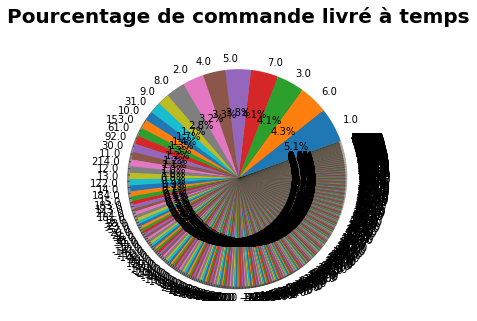

In [27]:
data = df_order['delivery_on_times1'].value_counts()

plt.rcParams["figure.figsize"]=[5,5]
fig = plt.figure()
fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
plt.title("Pourcentage de commande livré à temps", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
plt.draw()

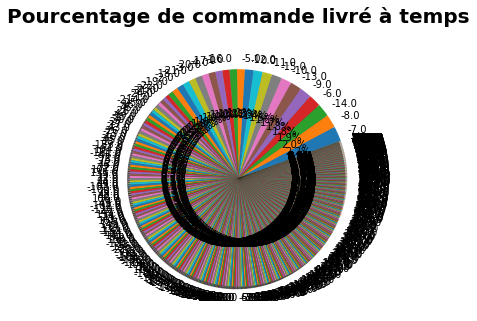

In [28]:
data = df_order['delivery_on_times2'].value_counts()



plt.rcParams["figure.figsize"]=[5,5]
fig = plt.figure()
fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
plt.title("Pourcentage de commande livré à temps", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
plt.draw()

In [29]:
df_order.describe()

,delai_commande,delai_expedition,delai_livraison,delivery_on_times1,delivery_on_times2
count,99281.000000,97658.000000,96476.000000,96475.000000,96476.000000
mean,0.507015,3.826343,12.982877,9.174004,-10.603850
std,37.344129,82.926429,118.754209,109.383916,115.593644
min,-322.000000,-333.000000,-333.000000,-333.000000,-537.000000
25%,0.000000,1.000000,-36.000000,-18.000000,-61.000000
50%,0.000000,3.000000,9.000000,6.000000,-10.000000
75%,1.000000,31.000000,67.000000,41.000000,44.000000
max,543.000000,476.000000,688.000000,688.000000,347.000000


Data order filtré

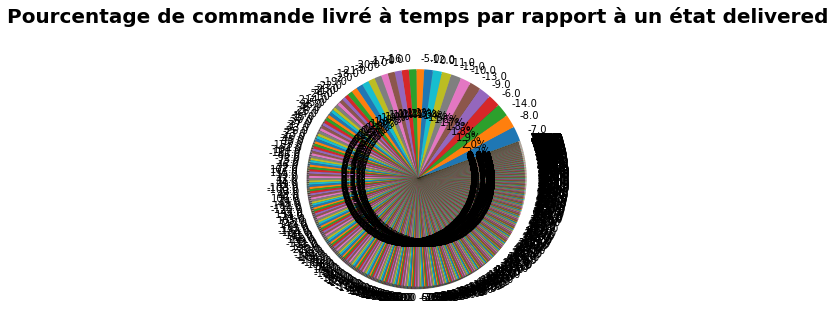

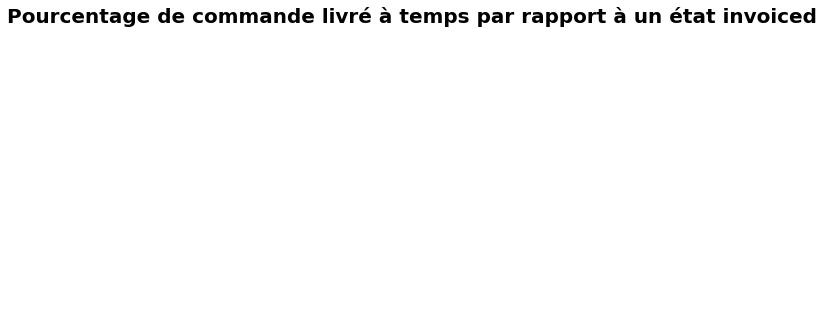

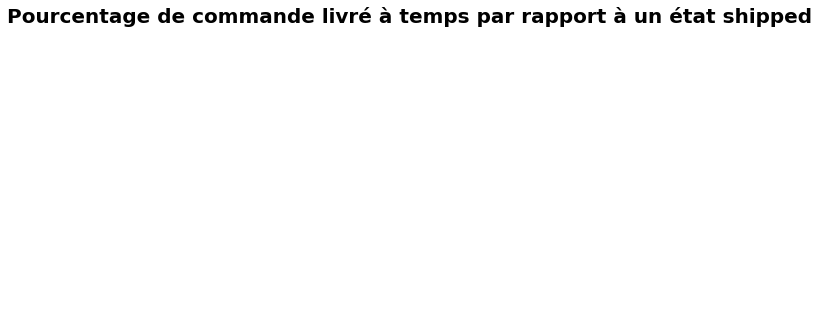

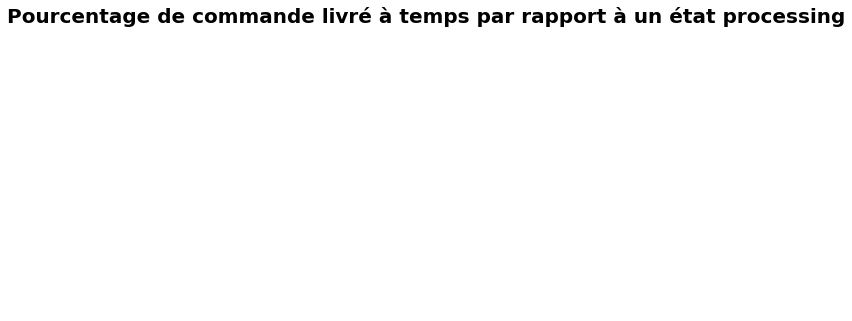

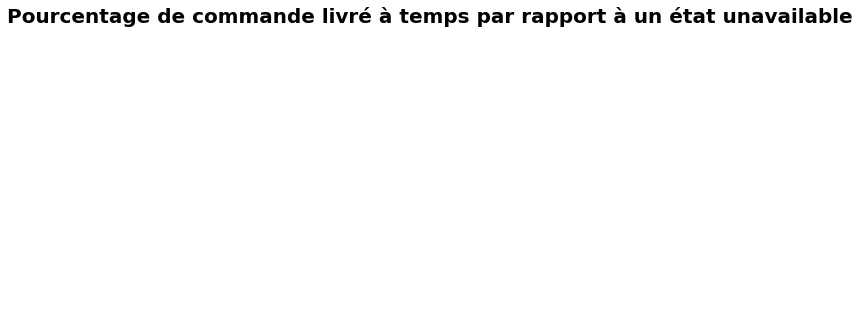

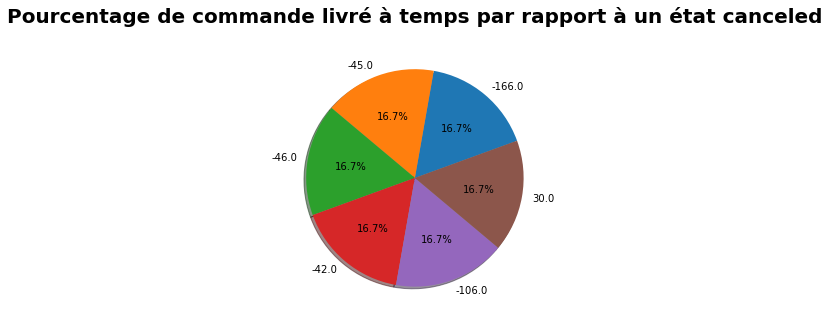

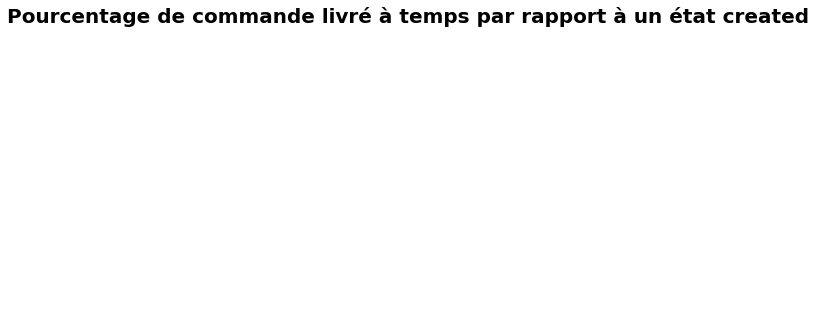

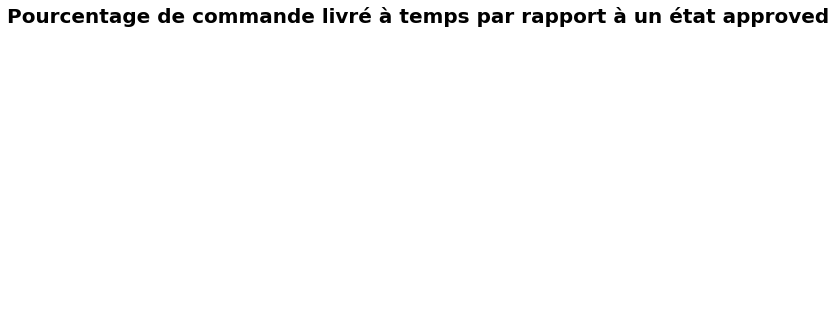

In [30]:
for ligne in df_order["order_status"].unique():
    df_order_etat = df_order[df_order["order_status"]==ligne]
    data = df_order_etat['delivery_on_times2'].value_counts()
    plt.rcParams["figure.figsize"]=[5,5]
    fig = plt.figure()
    fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
    plt.title(f"Pourcentage de commande livré à temps par rapport à un état {ligne}", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
    plt.draw()

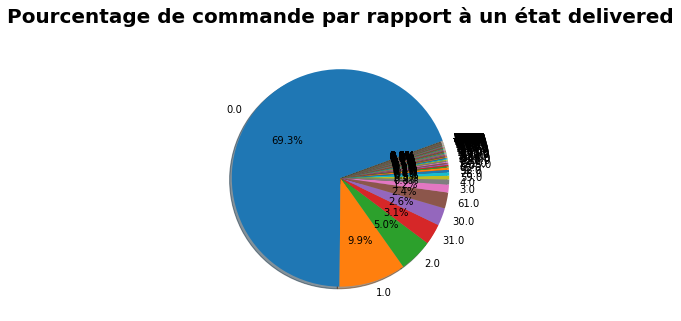

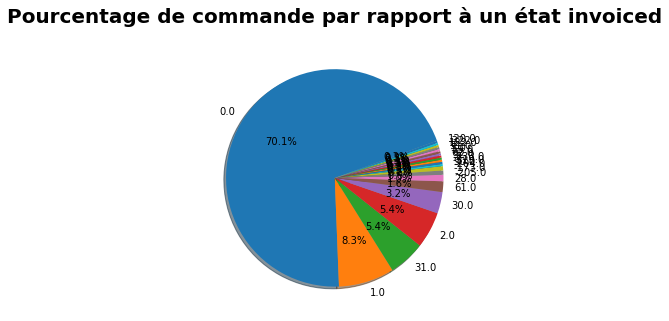

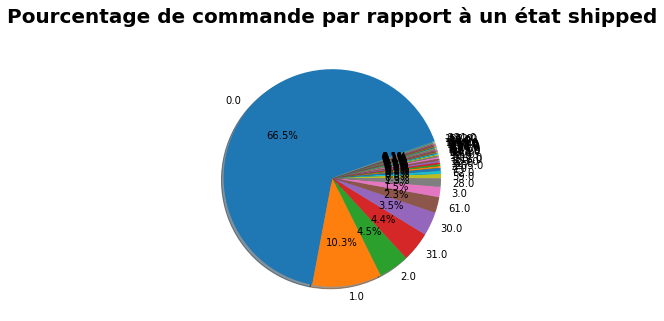

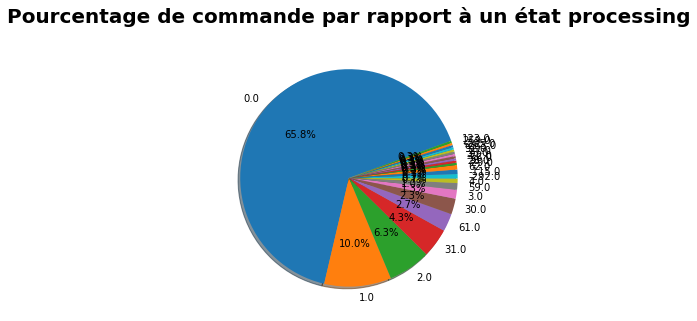

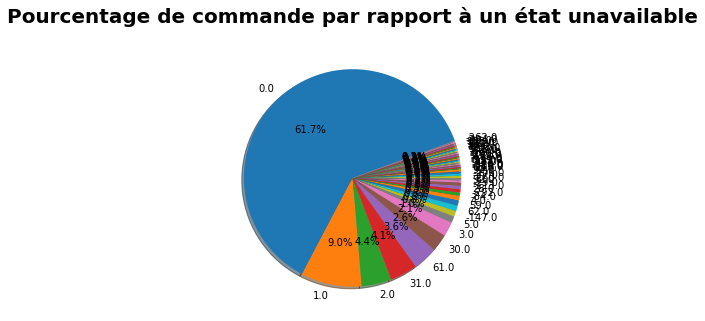

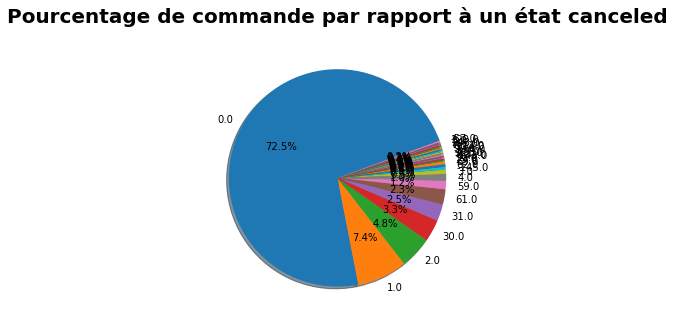

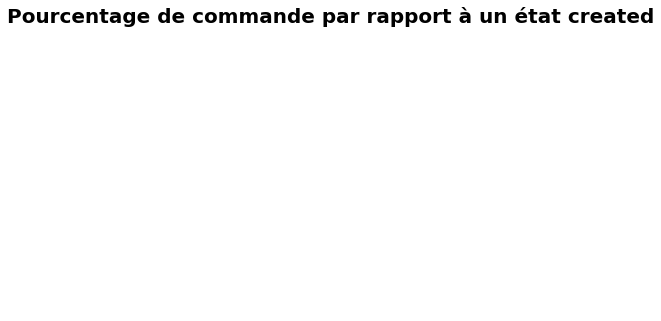

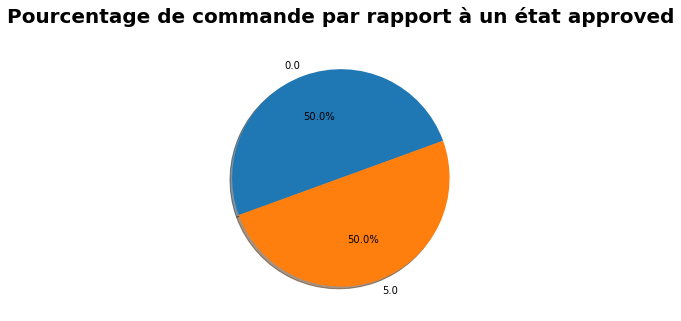

In [31]:
for ligne in df_order["order_status"].unique():#delai_commande	delai_expedition	delai_livraison	delivery_on_times
    df_order_etat = df_order[df_order["order_status"]==ligne]
    data = df_order_etat['delai_commande'].value_counts()
    plt.rcParams["figure.figsize"]=[5,5]
    fig = plt.figure()
    fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
    plt.title(f"Pourcentage de commande par rapport à un état {ligne}", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
    plt.draw()

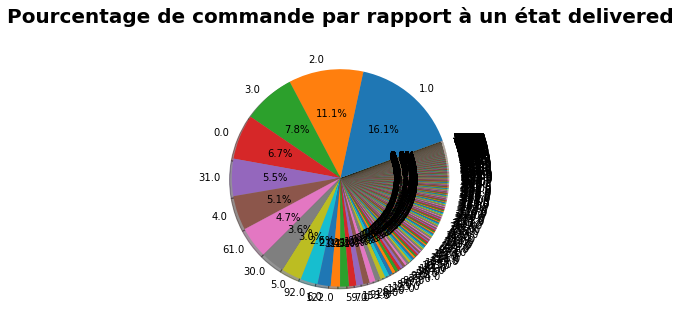

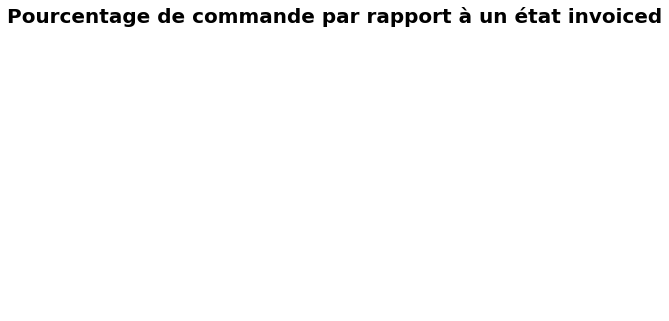

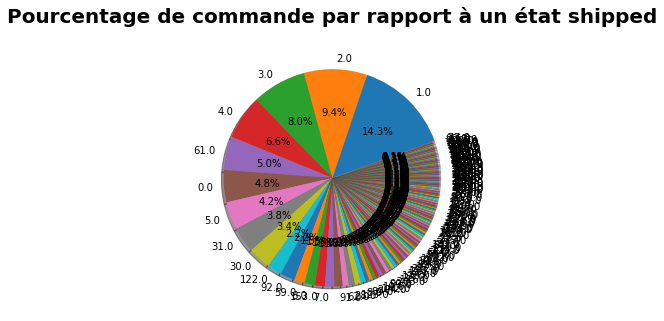

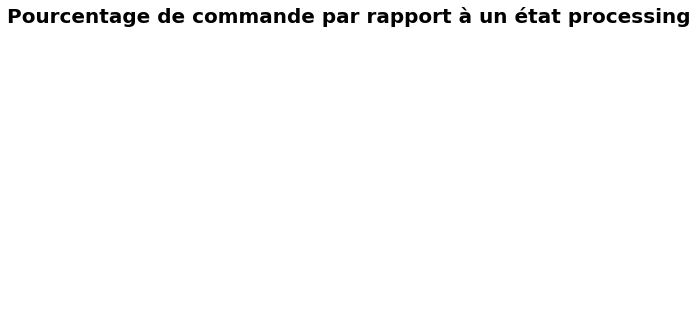

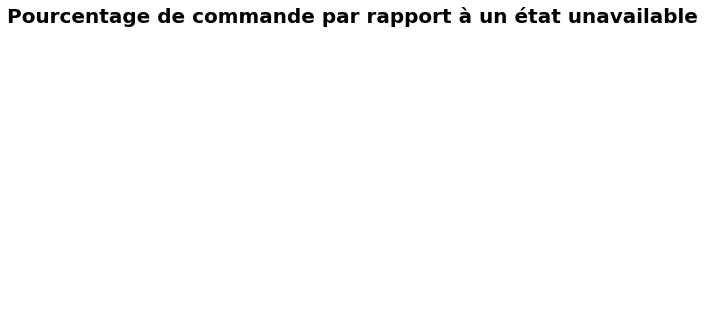

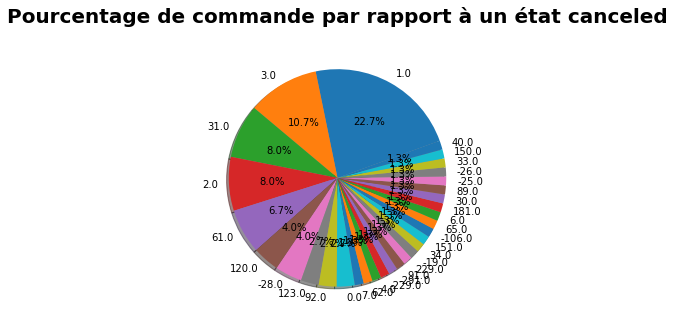

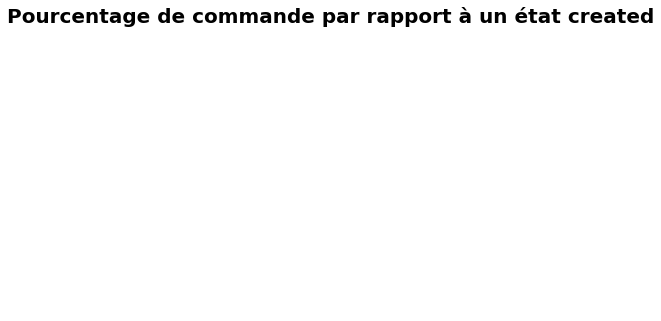

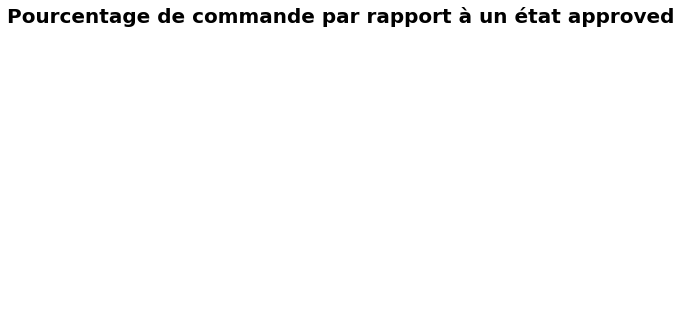

In [32]:
for ligne in df_order["order_status"].unique():#delai_commande	delai_expedition	delai_livraison	delivery_on_times
    df_order_etat = df_order[df_order["order_status"]==ligne]
    data = df_order_etat['delai_expedition'].value_counts()
    plt.rcParams["figure.figsize"]=[5,5]
    fig = plt.figure()
    fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
    plt.title(f"Pourcentage de commande par rapport à un état {ligne}", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
    plt.draw()

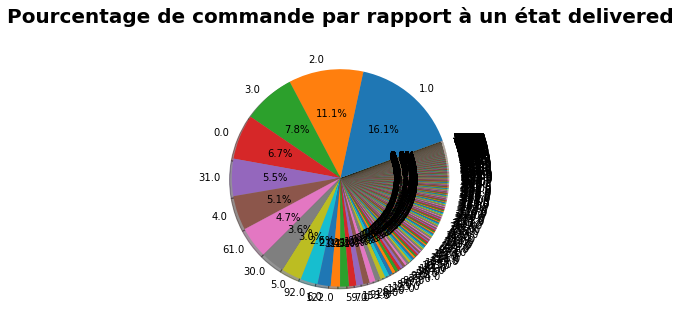

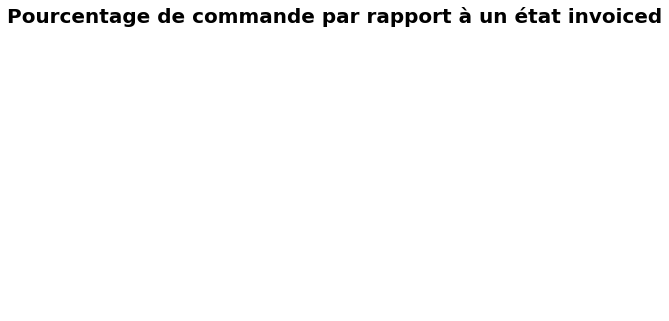

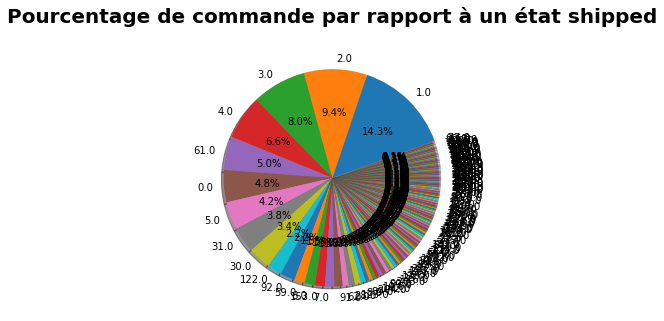

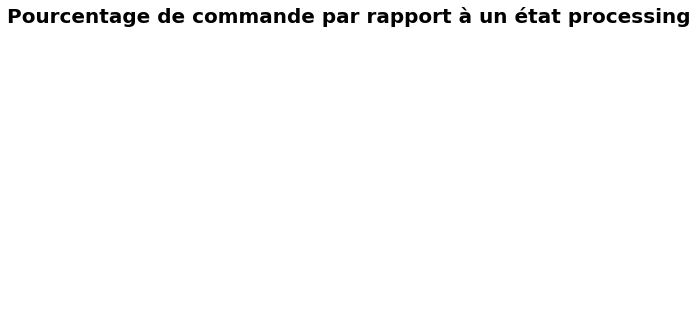

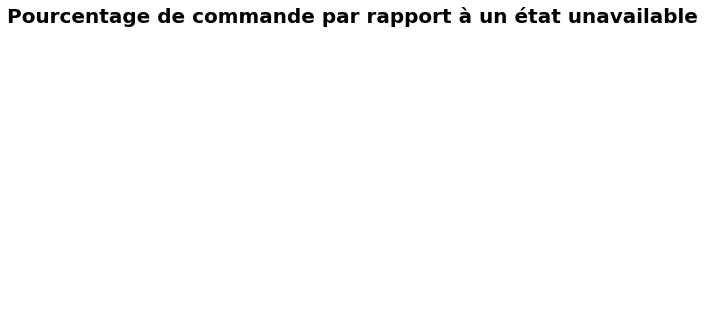

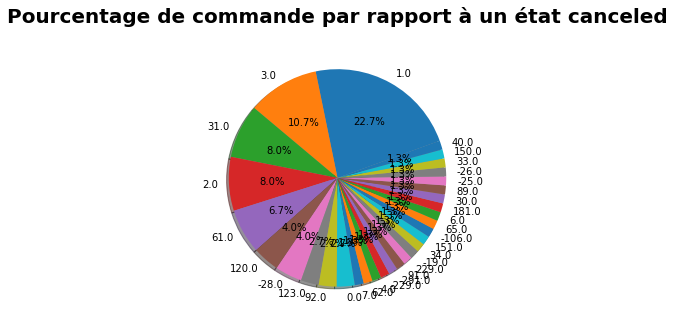

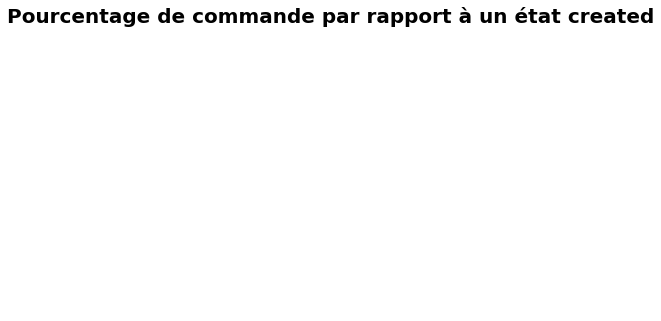

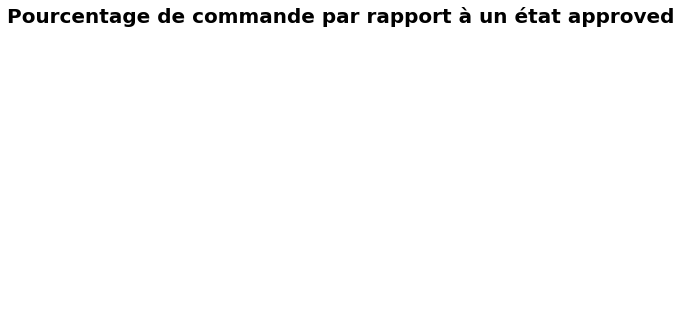

In [33]:
for ligne in df_order["order_status"].unique():#delai_commande	delai_expedition	delai_livraison	delivery_on_times
    df_order_etat = df_order[df_order["order_status"]==ligne]
    data = df_order_etat['delai_expedition'].value_counts()
    plt.rcParams["figure.figsize"]=[5,5]
    fig = plt.figure()
    fig.patch.set_facecolor('white') # Pour changer le fond couleur du graphique
    plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=380)
    plt.title(f"Pourcentage de commande par rapport à un état {ligne}", y=1.05 , color="black", fontsize = 20, fontweight = "bold")
    plt.draw()

In [34]:
df_order = df_order.drop(['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date'], axis = 1)

In [35]:
df_order

,order_id,customer_id,order_status,delai_commande,delai_expedition,delai_livraison,delivery_on_times1,delivery_on_times2
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,0.0,59.0,242.0,183.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2.0,2.0,-16.0,-18.0,-36.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,0.0,0.0,9.0,9.0,130.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,0.0,4.0,-279.0,-283.0,-306.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,0.0,1.0,3.0,2.0,-10.0
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,0.0,30.0,-170.0,-200.0,-11.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,0.0,30.0,-94.0,-124.0,25.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,0.0,1.0,25.0,24.0,-6.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,0.0,122.0,-188.0,-310.0,-21.0


In [36]:
df_order.to_csv('../DATA/df_order.csv',index=False)